## This Kernel aims at exploring training dataset 

In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [19]:
train_data_dir = 'data/train'
train_labels_path = "data/train.csv"

In [31]:
def import_images(image_folder, resize_size, nb_images):
    """ Import images from a folder
    Output : dict('image_name': IMAGE (List of pixels))
    """
    image_dict = {}
    i = 0
    for element in os.listdir(image_folder):
        if i < nb_images:
            img = cv2.imread(
                image_folder + "/" + element)
            img = cv2.resize(img, (resize_size, resize_size))
            img = img.astype(np.float32)
            image_dict[element] = img
            i += 1
        else:
            break
    return image_dict

In [32]:
def import_labels(label_path):
    """ This function import labels from csv / Create a list of unique
    labels and a dict with image_name and its label
    Output : dict('image_name': 'label')
    """
    labels_df = pd.read_csv(label_path)
    dict_labels = labels_df.set_index('Image').to_dict()['Id']
    unique_labels = sorted(list(set(dict_labels.values())))
    for index, label in dict_labels.items():
        dict_labels[index] = unique_labels.index(label)
    return dict_labels, unique_labels

In [63]:
dict_labels, unique_labels = import_labels(train_labels_path)
image_dict = import_images(train_data_dir, 128, 10)

In [64]:
print(image_dict)

{'00022e1a.jpg': array([[[ 209.,  209.,  209.],
        [ 205.,  205.,  205.],
        [ 208.,  208.,  208.],
        ..., 
        [ 250.,  250.,  250.],
        [ 250.,  250.,  250.],
        [ 251.,  251.,  251.]],

       [[ 108.,  108.,  108.],
        [  66.,   66.,   66.],
        [  72.,   72.,   72.],
        ..., 
        [ 187.,  187.,  187.],
        [ 186.,  186.,  186.],
        [ 237.,  237.,  237.]],

       [[ 149.,  149.,  149.],
        [  92.,   92.,   92.],
        [ 208.,  208.,  208.],
        ..., 
        [ 212.,  212.,  212.],
        [ 192.,  192.,  192.],
        [ 236.,  236.,  236.]],

       ..., 
       [[ 255.,  255.,  255.],
        [ 255.,  255.,  255.],
        [ 255.,  255.,  255.],
        ..., 
        [ 255.,  255.,  255.],
        [ 255.,  255.,  255.],
        [ 255.,  255.,  255.]],

       [[ 255.,  255.,  255.],
        [ 255.,  255.,  255.],
        [ 255.,  255.,  255.],
        ..., 
        [ 255.,  255.,  255.],
        [ 255.,  255.,  

### Visualize different whales humpback

data/train/00022e1a.jpg


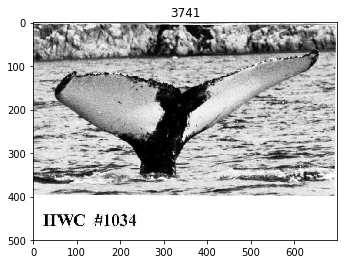

data/train/001296d5.jpg


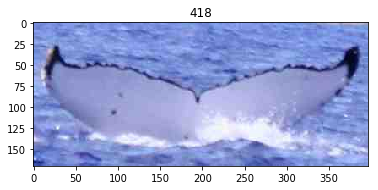

data/train/0031c258.jpg


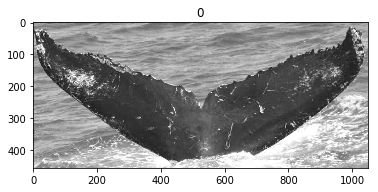

data/train/0037e7d3.jpg


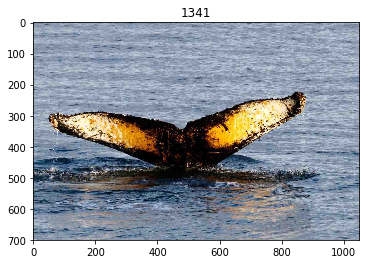

data/train/00087b01.jpg


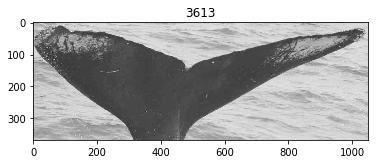

data/train/0035632e.jpg


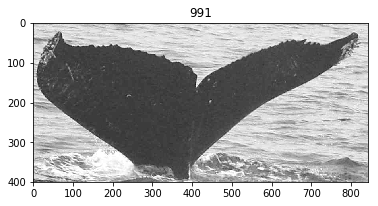

data/train/0014cfdf.jpg


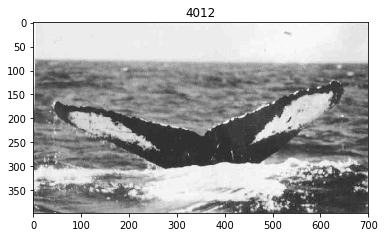

data/train/000466c4.jpg


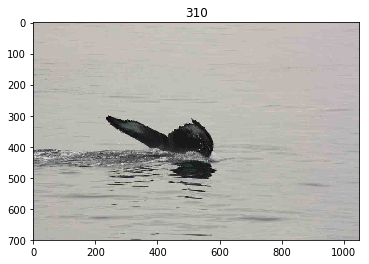

data/train/0025e8c2.jpg


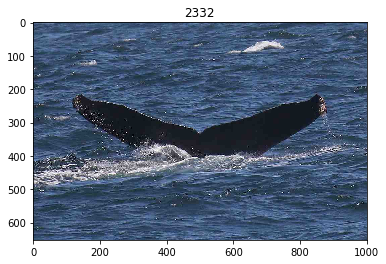

data/train/0026a8ab.jpg


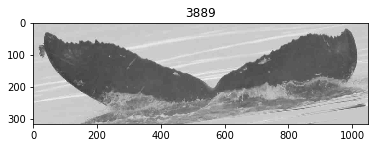

In [65]:
for img_path in image_dict.keys():
    print(train_data_dir + "/" + img_path)
    img = cv2.imread(train_data_dir + "/" +img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.title(dict_labels[img_path])
    plt.show()

## Information on classes

In [74]:
all_labels = list(dict_labels.values())
print("Nombre de labels : ", len(all_labels))
print("Nombre de labels différents :", len(unique_labels))


Nombre de labels :  9850
Nombre de labels différents : 4251


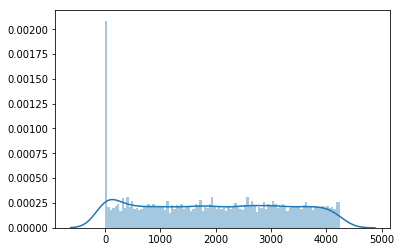

In [86]:
sns.distplot(all_labels, bins=100)
plt.show()